# Correlation Studies

In [1]:
from iqtools import *
import numpy as np
from pylab import psd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
filename = '238UFrag-2014.10.16.22.59.27.383.tiq'
#filename='RSA51-2014.10.12.00.00.18.259.TIQ'
iq_data= IQData()
#_,_ = iq_data.read_tiq(filename, 120, 1024, 357)
#_,_ = iq_data.read_tiq(filename, 120, 1024, 1550)
_,_ = iq_data.read_tiq(filename, 1000, 1024, 20)
x1 = iq_data.data_array
fs1 = iq_data.fs
center1 = iq_data.center
span1 = iq_data.span

In [24]:
f, p = get_pwelch(x1, fs1)

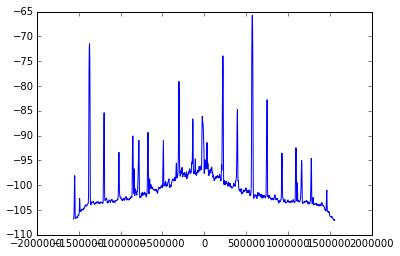

In [25]:
plt.plot(f, get_dbm(p))

In [16]:
f, v, p = get_fft_50_ohm(x1, fs1)

In [ ]:
f, p = get_pwelch(x1, fs1)
f_peak, p_peak = get_broad_peak_dbm(f, p)
plot_dbm_per_hz(f, p, 0, span1)
plt.plot(f_peak, p_peak, 'rv')
print(f_peak[0], center1+f_peak[0], p_peak[0])
np.savetxt('for_rqa_before.txt', np.real(x1)*1e6)

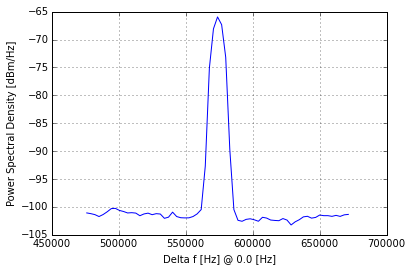

In [38]:
fz, pz = zoom_in_freq(f, p, 573730.46875, 2e5)
plot_dbm_per_hz(fz, pz)

In [41]:
get_pwelch(np.fft.ifft(np.fft.fftshift(pz)), fs1)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/signal/spectral.py:281: UserWarning: nperseg = 1024, is greater than x.shape[-1] = 65, using nperseg = x.shape[-1]
  % (nperseg, axis, x.shape[axis], axis))


(array([-1538461.53846154, -1490384.61538462, -1442307.69230769,
        -1394230.76923077, -1346153.84615385, -1298076.92307692,
        -1250000.        , -1201923.07692308, -1153846.15384615,
        -1105769.23076923, -1057692.30769231, -1009615.38461538,
         -961538.46153846,  -913461.53846154,  -865384.61538462,
         -817307.69230769,  -769230.76923077,  -721153.84615385,
         -673076.92307692,  -625000.        ,  -576923.07692308,
         -528846.15384615,  -480769.23076923,  -432692.30769231,
         -384615.38461538,  -336538.46153846,  -288461.53846154,
         -240384.61538462,  -192307.69230769,  -144230.76923077,
          -96153.84615385,   -48076.92307692,        0.        ,
           48076.92307692,    96153.84615385,   144230.76923077,
          192307.69230769,   240384.61538462,   288461.53846154,
          336538.46153846,   384615.38461538,   432692.30769231,
          480769.23076923,   528846.15384615,   576923.07692308,
          625000.        

In [35]:
x1c, x1sc = shift_and_cut(x1, 32)

In [36]:
xcor = np.correlate(x1c, x1sc, mode='same')

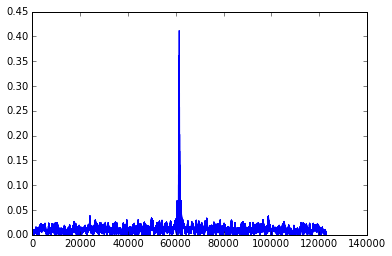

In [37]:
plt.plot(abs(xcor))

In [30]:
acor = np.correlate(x1, x1, mode='same')

In [31]:
aacor = np.abs(acor)

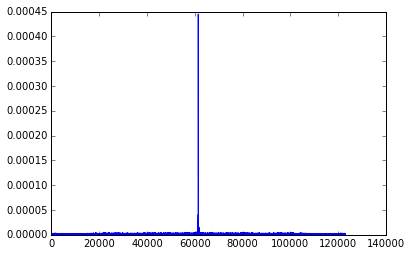

In [32]:
plt.plot(aacor)

NameError: name 'blah' is not defined

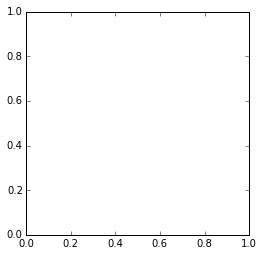

In [33]:
plt.gca().set_aspect('equal')
plt.plot(np.abs(blah), np.abs(bloops), 'r.')
plt.grid(1)
plt.savefig('plt.pdf')
np.savetxt('for_rqa.txt', np.abs(x1))

In [13]:
r = [2,3,4,5,6,7,8,89]

In [15]:
np.delete(r, [3])

array([ 2,  3,  4,  6,  7,  8, 89])

In [17]:
aacor.argmax()

512

In [22]:
c = np.delete(aacor, [512])

In [39]:
1/fs1

3.2e-07

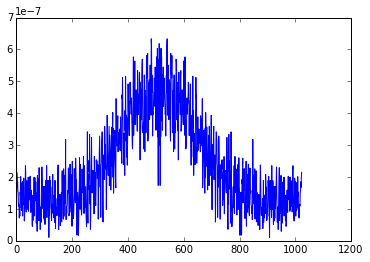

In [34]:
plt.plot(c)

In [35]:
np.savetxt('ForFalseNear.txt', c)

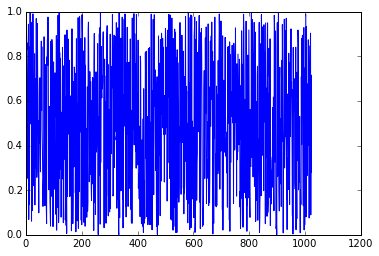

In [61]:
a = np.random.rand(1024)
plt.plot(a)

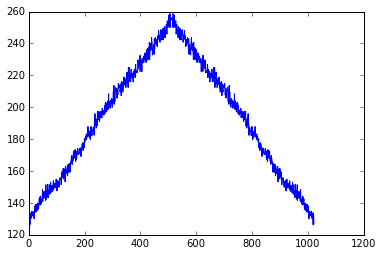

In [62]:
plt.plot(np.delete(np.correlate(a, a, mode ='same'), 512))

In [63]:
blah, bloops = shift_and_cut(a, 254)

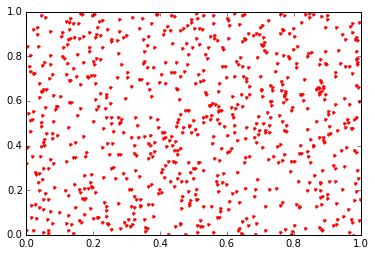

In [66]:
plt.plot(blah, bloops, 'r.')

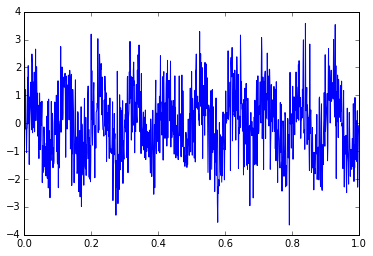

In [16]:
t, b = make_signal(10, 1e3, noise=True)
plt.plot(t, b)

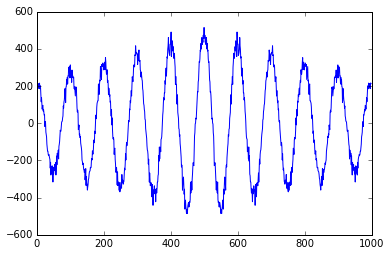

In [21]:
plt.plot(np.delete(np.correlate(b, b, mode ='same'), np.correlate(b, b, mode ='same').argmax()))

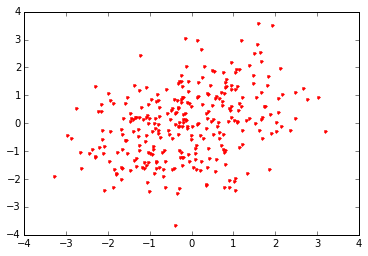

In [25]:
blah, bloops = shift_and_cut(b,700)
plt.plot(blah, bloops, 'r.')

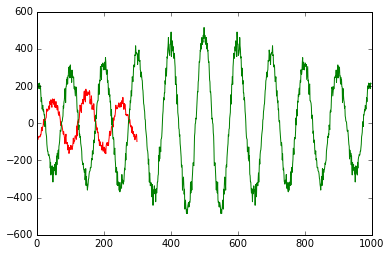

In [27]:
plt.plot(np.correlate(blah, bloops, mode ='same'), 'r')
plt.plot(np.delete(np.correlate(b, b, mode ='same'), np.correlate(b, b, mode ='same').argmax()), 'g')

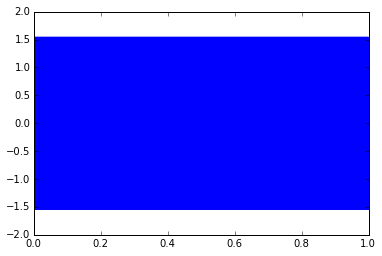

In [19]:
t2, x2 = make_signal(2000, 1e4, nharm=1, noise=False)
plt.plot(t2, x2)

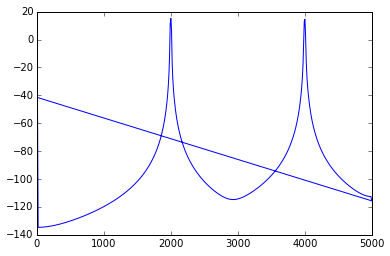

In [20]:
#f2, v2, p2 = get_fft_50_ohm(x2, 1e4)
f2, p2 = get_pwelch(x2, 1e4)
plt.plot(f2, get_dbm(p2))

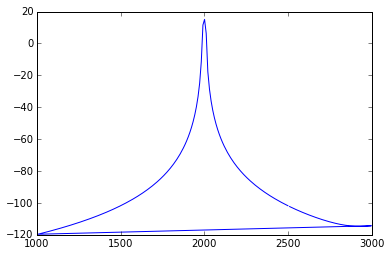

In [25]:
f2z, p2z = zoom_in_freq(f2, p2, 2000, 2000)
plt.plot(f2z, get_dbm(p2z))

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


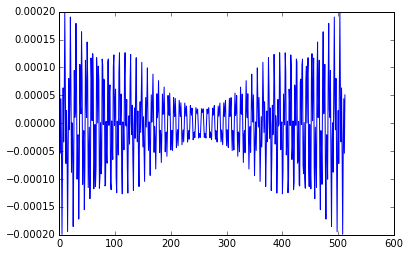

In [29]:
plt.plot(np.fft.ifft(p2))